In [1]:
from mitoolspro import clustering as cl
from pandas import DataFrame
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load Data

In [2]:
n_samples = 1_000
n_features = 16
n_centers = 5

In [3]:
data, _ = make_blobs(n_samples=n_samples, centers=n_centers, n_features=n_features, random_state=0)
data = DataFrame(data, columns=[f"feature_{i}" for i in range(n_features)], index=[f"sample_{i}" for i in range(n_samples)])

In [4]:
data

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
sample_0,-0.194980,1.254796,-9.524979,2.985020,0.398546,2.091548,9.736626,4.273136,-2.155918,-0.704956,3.634870,-9.559823,3.925414,4.204070,-5.034615,-6.642884
sample_1,-3.906855,-1.198190,0.726655,0.699463,10.553579,-8.224395,-6.710856,-6.548466,2.526965,-5.496246,-0.099776,-4.800387,-5.293182,-8.188856,2.923601,-5.897135
sample_2,-1.023764,2.148136,-10.304530,3.314962,1.383192,3.556180,9.164662,1.038209,-4.351652,-1.177391,5.539949,-9.530431,4.064410,4.339739,-5.084274,-8.679195
sample_3,1.708694,3.928565,1.763626,-0.843359,-2.307208,3.188995,-0.203232,8.434500,8.932563,-3.594343,3.057142,1.729632,0.771662,8.063468,-8.447705,-9.662974
sample_4,-2.216142,-3.554518,2.420860,-1.925213,8.286455,-8.699966,-6.441094,-6.236828,2.779957,-5.078468,-1.466121,-5.726301,-6.883826,-7.673855,3.463933,-8.635754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample_995,-10.594911,7.027345,4.858794,8.474947,8.945068,7.517167,-0.352687,5.868967,-8.784940,3.127535,-7.087412,9.525461,-0.073881,-3.160391,-4.433666,5.624461
sample_996,-0.625571,4.265880,1.897962,1.173904,-2.152150,2.181391,-0.693208,8.491384,9.016605,-2.369646,6.238815,1.082242,0.216911,7.792359,-9.809825,-8.764321
sample_997,-9.105620,5.397358,5.605529,7.631031,8.262592,6.926564,-1.806379,5.016428,-8.816787,2.847460,-7.797578,11.163437,-0.206628,-1.520387,-4.989203,6.371332
sample_998,-6.703875,-2.341492,5.696691,-6.382176,5.383991,-8.265166,8.978263,-0.402218,9.631545,2.631243,5.203033,-10.270071,-2.640519,-7.700206,-4.646167,-7.480543


# Search N Clusters

100%|██████████| 23/23 [00:01<00:00, 21.48it/s]


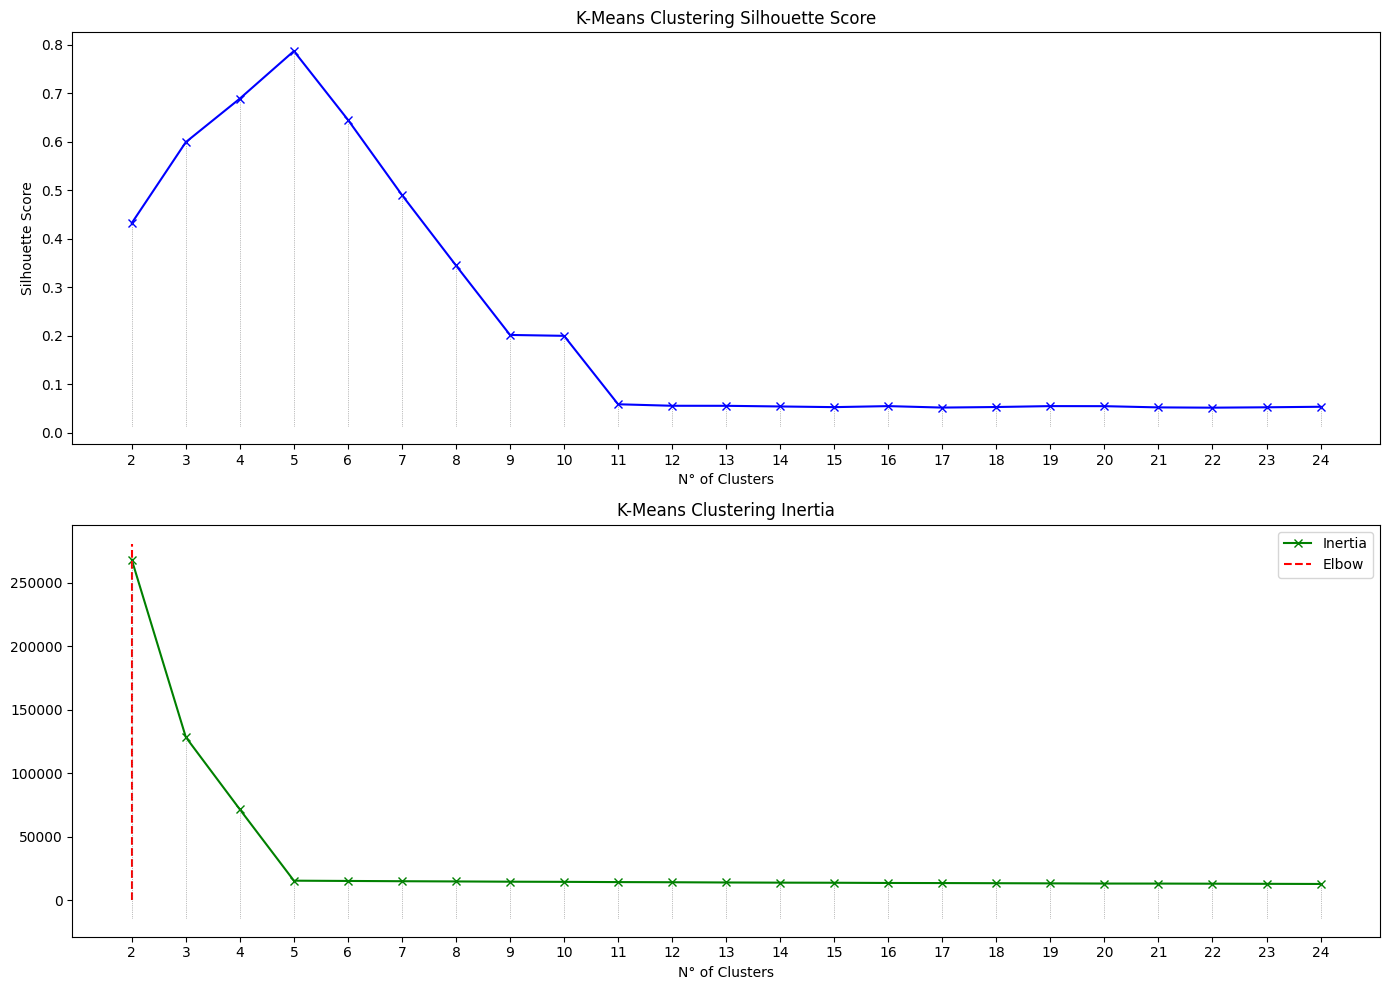

In [5]:
kmeans_scores, kmeans_inertia = cl.clustering_ncluster_search(data, max_clusters=25, clustering_method=cl.kmeans_clustering)
cl.plot_clustering_ncluster_search(kmeans_scores, kmeans_inertia, max_clusters=25, algorithm_name="K-Means Clustering")
plt.show()

100%|██████████| 23/23 [00:00<00:00, 48.67it/s]


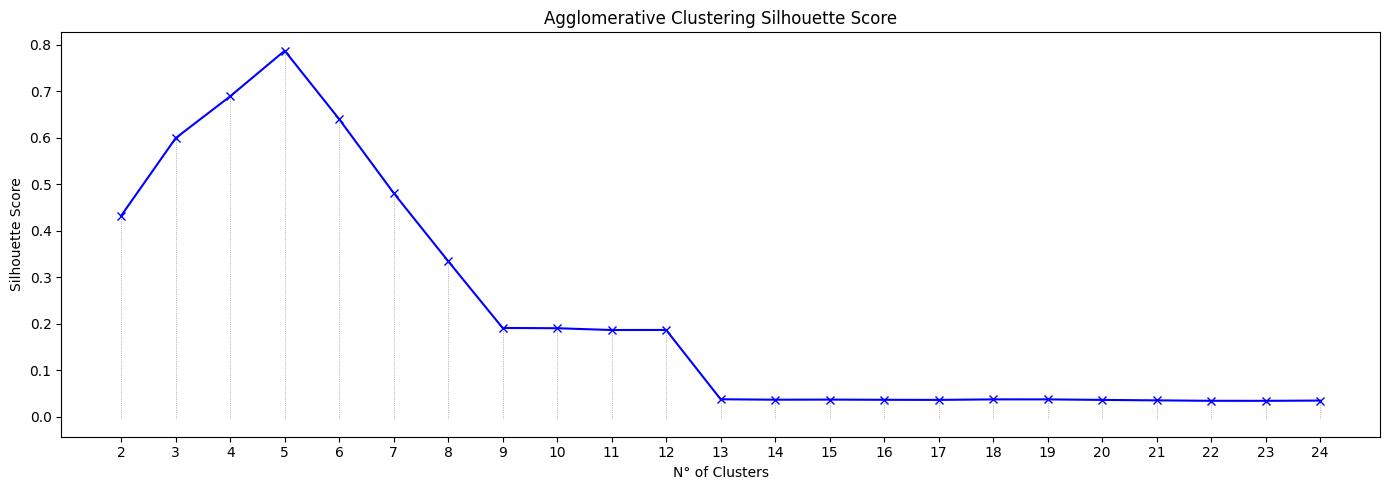

In [6]:
aggcl_scores, aggcl_inertia = cl.clustering_ncluster_search(data, max_clusters=25, clustering_method=cl.agglomerative_clustering)
cl.plot_clustering_ncluster_search(aggcl_scores, aggcl_inertia, max_clusters=25, algorithm_name="Agglomerative Clustering")
plt.show()

# Define N Clusters

In [7]:
n_clusters = n_centers
kmeans, kmeans_labels = cl.kmeans_clustering(data, n_clusters=n_clusters)
aggcl, aggcl_labels = cl.agglomerative_clustering(data, n_clusters=n_clusters)

# Add Labels to DataFrame Index

In [8]:
data.index = pd.MultiIndex.from_arrays([data.index, [f"cluster_{c}" for c in kmeans_labels], [f"cluster_{c}" for c in aggcl_labels]], names=[data.index.name, 'kmeans_cluster', 'agg_cluster'])

In [9]:
data

,,,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
,kmeans_cluster,agg_cluster,,,,,,,,,,,,,,,,
sample_0,cluster_1,cluster_0,-0.194980,1.254796,-9.524979,2.985020,0.398546,2.091548,9.736626,4.273136,-2.155918,-0.704956,3.634870,-9.559823,3.925414,4.204070,-5.034615,-6.642884
sample_1,cluster_0,cluster_1,-3.906855,-1.198190,0.726655,0.699463,10.553579,-8.224395,-6.710856,-6.548466,2.526965,-5.496246,-0.099776,-4.800387,-5.293182,-8.188856,2.923601,-5.897135
sample_2,cluster_1,cluster_0,-1.023764,2.148136,-10.304530,3.314962,1.383192,3.556180,9.164662,1.038209,-4.351652,-1.177391,5.539949,-9.530431,4.064410,4.339739,-5.084274,-8.679195
sample_3,cluster_3,cluster_3,1.708694,3.928565,1.763626,-0.843359,-2.307208,3.188995,-0.203232,8.434500,8.932563,-3.594343,3.057142,1.729632,0.771662,8.063468,-8.447705,-9.662974
sample_4,cluster_0,cluster_1,-2.216142,-3.554518,2.420860,-1.925213,8.286455,-8.699966,-6.441094,-6.236828,2.779957,-5.078468,-1.466121,-5.726301,-6.883826,-7.673855,3.463933,-8.635754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample_995,cluster_2,cluster_2,-10.594911,7.027345,4.858794,8.474947,8.945068,7.517167,-0.352687,5.868967,-8.784940,3.127535,-7.087412,9.525461,-0.073881,-3.160391,-4.433666,5.624461
sample_996,cluster_3,cluster_3,-0.625571,4.265880,1.897962,1.173904,-2.152150,2.181391,-0.693208,8.491384,9.016605,-2.369646,6.238815,1.082242,0.216911,7.792359,-9.809825,-8.764321
sample_997,cluster_2,cluster_2,-9.105620,5.397358,5.605529,7.631031,8.262592,6.926564,-1.806379,5.016428,-8.816787,2.847460,-7.797578,11.163437,-0.206628,-1.520387,-4.989203,6.371332


# Evaluate Clusters

In [10]:
centroids = cl.get_clusters_centroids(data, 'kmeans_cluster')
centroids

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
kmeans_cluster,,,,,,,,,,,,,,,,
cluster_0,-3.691186,-2.816776,1.381140,-1.273598,9.826545,-7.885421,-5.861652,-6.838426,3.094111,-4.946873,-0.731040,-5.079369,-6.828007,-7.839797,3.189452,-7.271739
cluster_1,-0.985821,1.226054,-9.681254,2.392227,2.141162,2.337875,8.842091,3.632385,-2.851507,-1.198275,4.006957,-8.820169,3.410344,3.273694,-5.734020,-7.585376
cluster_2,-9.672163,6.598300,5.589595,7.476823,9.558155,5.980075,-0.860339,5.711577,-7.616657,2.764899,-7.138527,8.840422,0.569369,-1.625485,-4.707599,5.409230
cluster_3,1.077738,4.201313,2.017937,0.906887,-1.714395,2.957125,-1.363783,7.782466,9.204573,-2.381420,5.814003,0.589633,1.367288,8.600165,-8.630341,-8.325188
cluster_4,-6.040380,-2.559934,6.361063,-8.039102,6.870333,-8.024077,9.540436,-0.602519,9.542959,2.176424,4.949971,-9.222526,-4.434678,-7.660539,-4.048839,-7.522762


In [11]:
distances_between_centroids = cl.get_distances_between_centroids(centroids)
distances_between_centroids

kmeans_cluster,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
kmeans_cluster,,,,,
cluster_0,0.000000,32.292445,36.318785,34.044949,23.685655
cluster_1,32.292445,0.000000,34.736454,23.850778,30.070188
cluster_2,36.318785,34.736454,0.000000,34.241525,41.062393
cluster_3,34.044949,23.850778,34.241525,0.000000,31.880882
cluster_4,23.685655,30.070188,41.062393,31.880882,0.000000


In [12]:
distances_to_cetroids = cl.get_distances_to_centroids(data, centroids, 'kmeans_cluster')
distances_to_cetroids

,,,distance_to_kmeans_cluster_centroid
,kmeans_cluster,agg_cluster,
sample_0,cluster_1,cluster_0,3.038309
sample_1,cluster_0,cluster_1,3.738168
sample_2,cluster_1,cluster_0,4.390039
sample_3,cluster_3,cluster_3,4.323037
sample_4,cluster_0,cluster_1,3.316637
...,...,...,...
sample_995,cluster_2,cluster_2,3.232062
sample_996,cluster_3,cluster_3,2.958934
sample_997,cluster_2,cluster_2,3.825683


/Users/sebastian/Desktop/MontagnaInc/Projects/miToolsPro/mitoolspro/clustering/clustering_visualizations.py:121: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/Users/sebastian/Desktop/MontagnaInc/Projects/miToolsPro/mitoolspro/clustering/clustering_visualizations.py:121: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/Users/sebastian/Desktop/MontagnaInc/Projects/miToolsPro/mitoolspro/clustering/clustering_visualizations.py:121: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/Users/sebastian/Desktop/MontagnaInc/Projects/miToolsPro/mitoolspro/clustering/clustering_visualizations.py:1

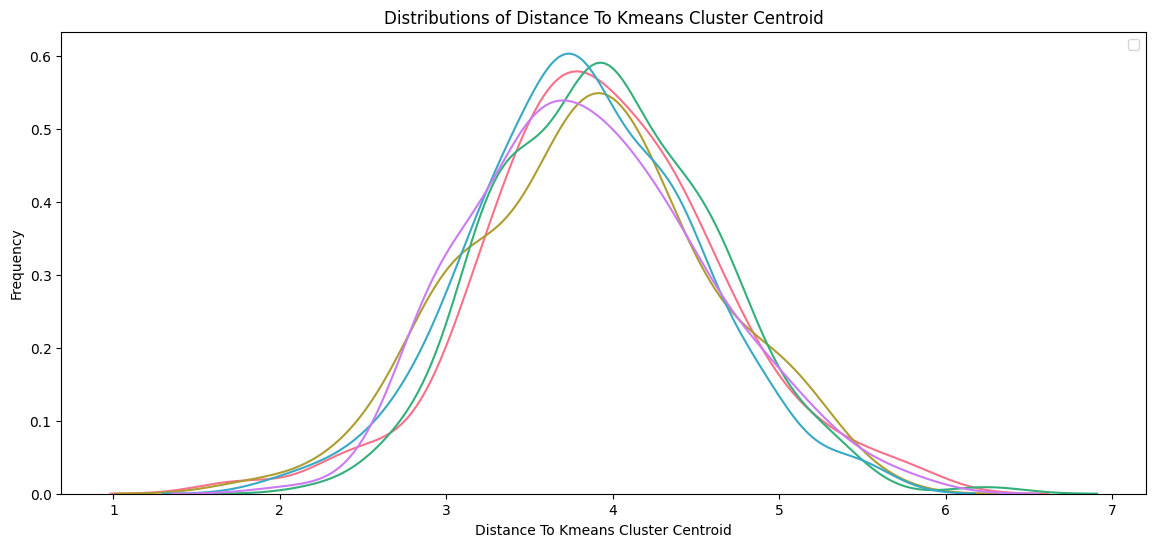

In [13]:
_ = cl.plot_dfs_col_distribution([g for _, g in distances_to_cetroids.groupby('kmeans_cluster')], column=0, normed=False, bins=None, colors=None)

In [14]:
cl.get_clusters_size(data, 'kmeans_cluster')

,N Elements
kmeans_cluster,
cluster_0,200
cluster_1,200
cluster_2,200
cluster_3,200
cluster_4,200


In [15]:
cluster_cosine_sims = cl.get_cosine_similarities(data.loc[data.index.get_level_values('kmeans_cluster') == 'cluster_0'], id_level=0, as_vector=False)
cluster_cosine_sims

,sample_1,sample_4,sample_5,sample_10,sample_25,sample_35,sample_46,sample_48,sample_49,sample_57,...,sample_962,sample_965,sample_969,sample_971,sample_974,sample_975,sample_977,sample_979,sample_980,sample_988
sample_1,1.000000,0.963040,0.982569,0.965705,0.954706,0.944149,0.958622,0.977469,0.973382,0.974608,...,0.952255,0.954670,0.979742,0.959566,0.983094,0.977827,0.978607,0.964461,0.963082,0.981686
sample_4,0.963040,1.000000,0.985057,0.968057,0.973948,0.983870,0.976134,0.982094,0.965039,0.968394,...,0.980247,0.969823,0.979948,0.957468,0.977535,0.952803,0.982744,0.980250,0.983065,0.966037
sample_5,0.982569,0.985057,1.000000,0.985897,0.981486,0.973562,0.977501,0.983516,0.980815,0.985518,...,0.971778,0.973814,0.986108,0.973248,0.987325,0.976957,0.985007,0.985958,0.982607,0.985610
sample_10,0.965705,0.968057,0.985897,1.000000,0.960835,0.954185,0.962810,0.970309,0.968806,0.960058,...,0.959376,0.953250,0.973751,0.965805,0.975959,0.970811,0.973053,0.980933,0.975584,0.961605
sample_25,0.954706,0.973948,0.981486,0.960835,1.000000,0.968726,0.960424,0.975090,0.963527,0.979089,...,0.952069,0.971323,0.968113,0.937847,0.976886,0.955378,0.972384,0.958000,0.983762,0.959876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample_975,0.977827,0.952803,0.976957,0.970811,0.955378,0.942192,0.946217,0.977197,0.973564,0.963210,...,0.955109,0.939737,0.964311,0.937553,0.974973,1.000000,0.959995,0.963422,0.953304,0.962552
sample_977,0.978607,0.982744,0.985007,0.973053,0.972384,0.971137,0.973609,0.979286,0.975945,0.978103,...,0.967481,0.966650,0.978603,0.971292,0.981564,0.959995,1.000000,0.973859,0.980168,0.965880
sample_979,0.964461,0.980250,0.985958,0.980933,0.958000,0.971447,0.964366,0.978126,0.966609,0.962172,...,0.975399,0.963896,0.982689,0.963340,0.976744,0.963422,0.973859,1.000000,0.973165,0.972638
sample_980,0.963082,0.983065,0.982607,0.975584,0.983762,0.970947,0.970840,0.982764,0.964499,0.977191,...,0.958284,0.961050,0.979430,0.954954,0.978209,0.953304,0.980168,0.973165,1.000000,0.962398


In [16]:
cluster_cosine_sims = cl.get_cosine_similarities(data.loc[data.index.get_level_values('kmeans_cluster') == 'cluster_0'], id_level=0, as_vector=True)
cluster_cosine_sims

cosine_similarity
sample_1   sample_4             0.963040
           sample_5             0.982569
           sample_10            0.965705
           sample_25            0.954706
           sample_35            0.944149
...                                  ...
sample_977 sample_980           0.980168
           sample_988           0.965880
sample_979 sample_980           0.973165
           sample_988           0.972638
sample_980 sample_988           0.962398

[19900 rows x 1 columns]

/Users/sebastian/Desktop/MontagnaInc/Projects/miToolsPro/mitoolspro/clustering/clustering_visualizations.py:121: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


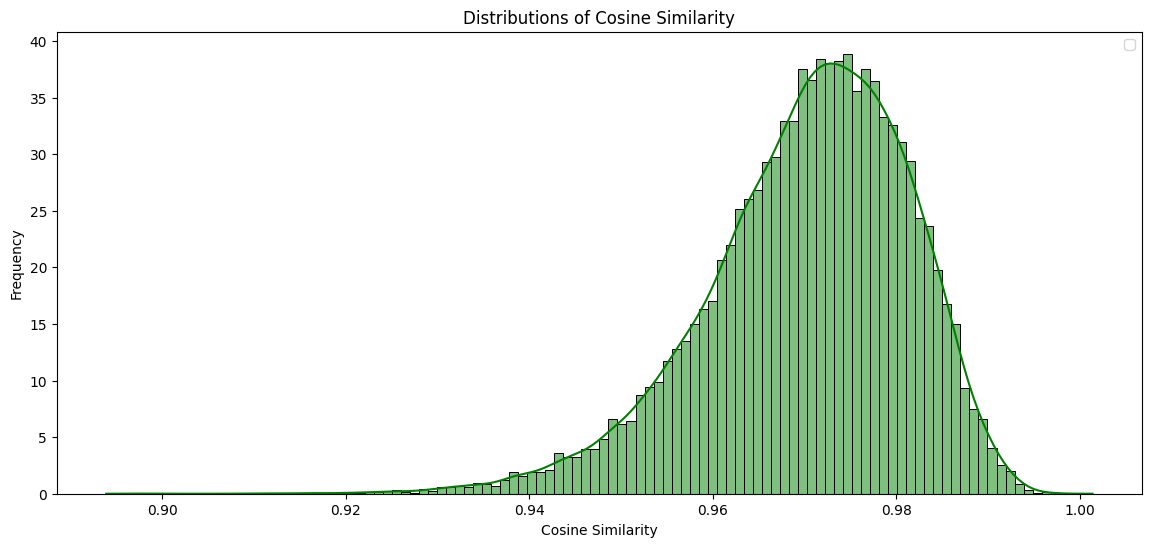

In [17]:
_ = cl.plot_df_col_distribution(cluster_cosine_sims, column=0, normed=False, bins=100, color="green")

In [18]:
clusters_cosine_sims = {cluster: cl.get_cosine_similarities(group, id_level=0, as_vector=True) for cluster, group in data.groupby('kmeans_cluster')}
clusters_cosine_sims['cluster_0']

cosine_similarity
sample_1   sample_4             0.963040
           sample_5             0.982569
           sample_10            0.965705
           sample_25            0.954706
           sample_35            0.944149
...                                  ...
sample_977 sample_980           0.980168
           sample_988           0.965880
sample_979 sample_980           0.973165
           sample_988           0.972638
sample_980 sample_988           0.962398

[19900 rows x 1 columns]

/Users/sebastian/Desktop/MontagnaInc/Projects/miToolsPro/mitoolspro/clustering/clustering_visualizations.py:121: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/Users/sebastian/Desktop/MontagnaInc/Projects/miToolsPro/mitoolspro/clustering/clustering_visualizations.py:121: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/Users/sebastian/Desktop/MontagnaInc/Projects/miToolsPro/mitoolspro/clustering/clustering_visualizations.py:121: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/Users/sebastian/Desktop/MontagnaInc/Projects/miToolsPro/mitoolspro/clustering/clustering_visualizations.py:1

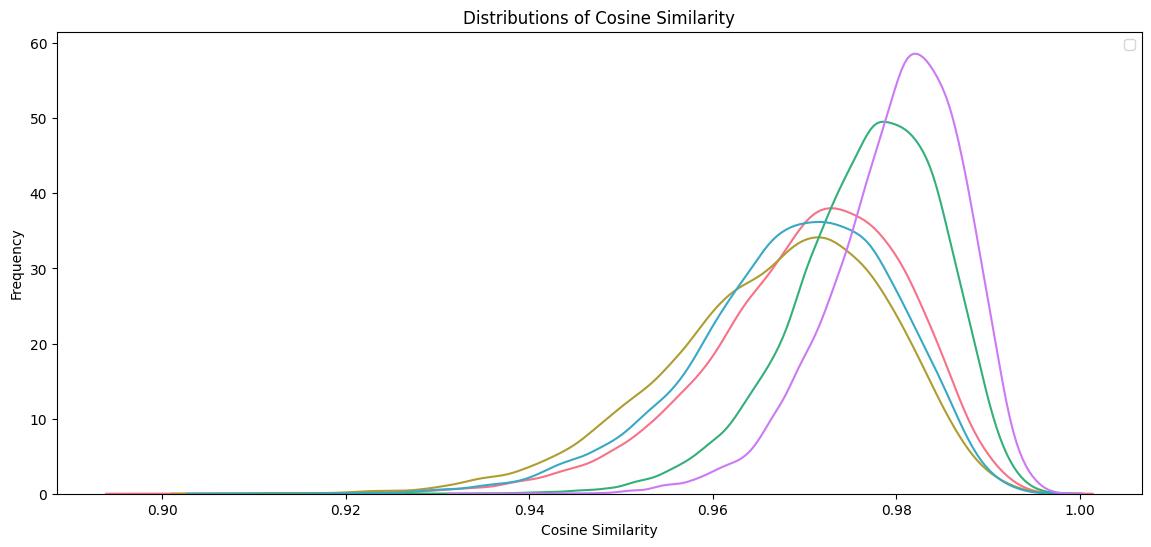

In [19]:
_ = cl.plot_dfs_col_distribution(clusters_cosine_sims.values(), column=0, normed=False, bins=None, colors=None)

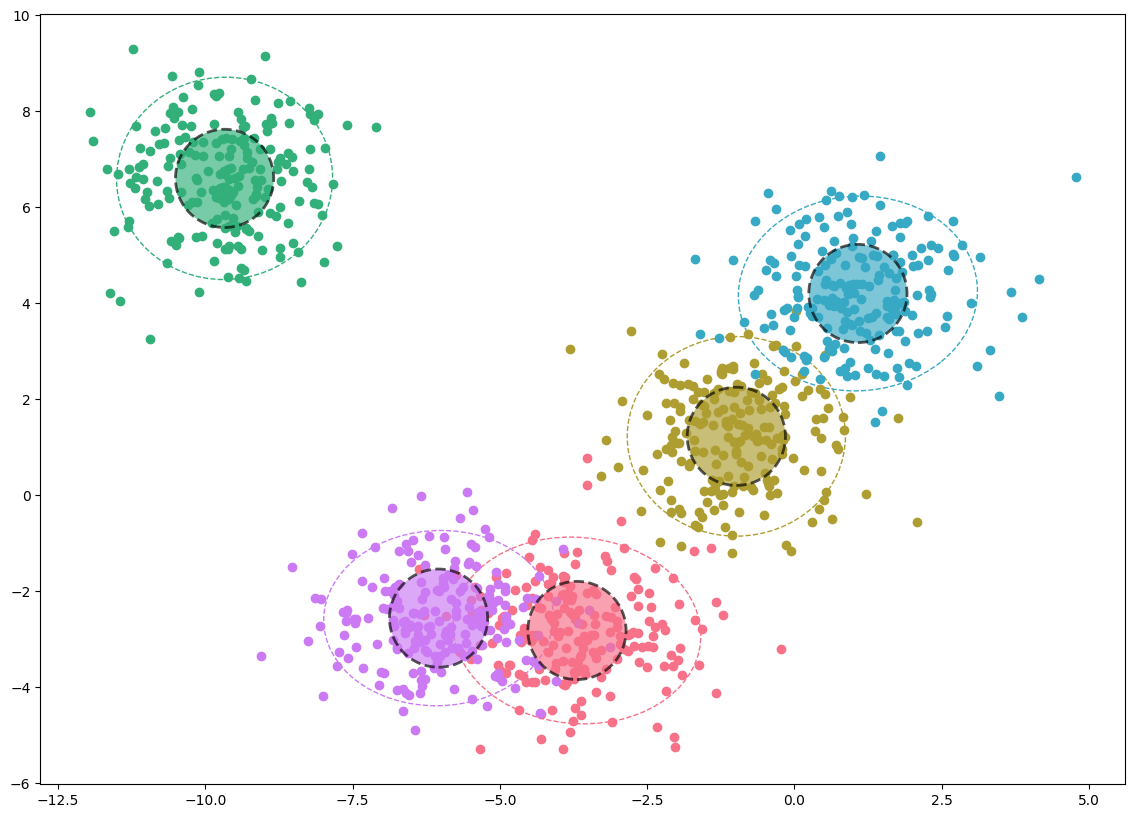

In [20]:
ax = cl.plot_clusters(data, 'kmeans_cluster', 'feature_0', 'feature_1')
ax = cl.add_clusters_ellipse(ax, data, 'kmeans_cluster', 'feature_0', 'feature_1', linestyle='--')
ax = cl.add_clusters_centroids(ax, centroids, 0, 'feature_0', 'feature_1', s=5000, marker='o', alpha=0.66, zorder=99, edgecolor='k', linewidth=2, linestyle='--')
plt.show()

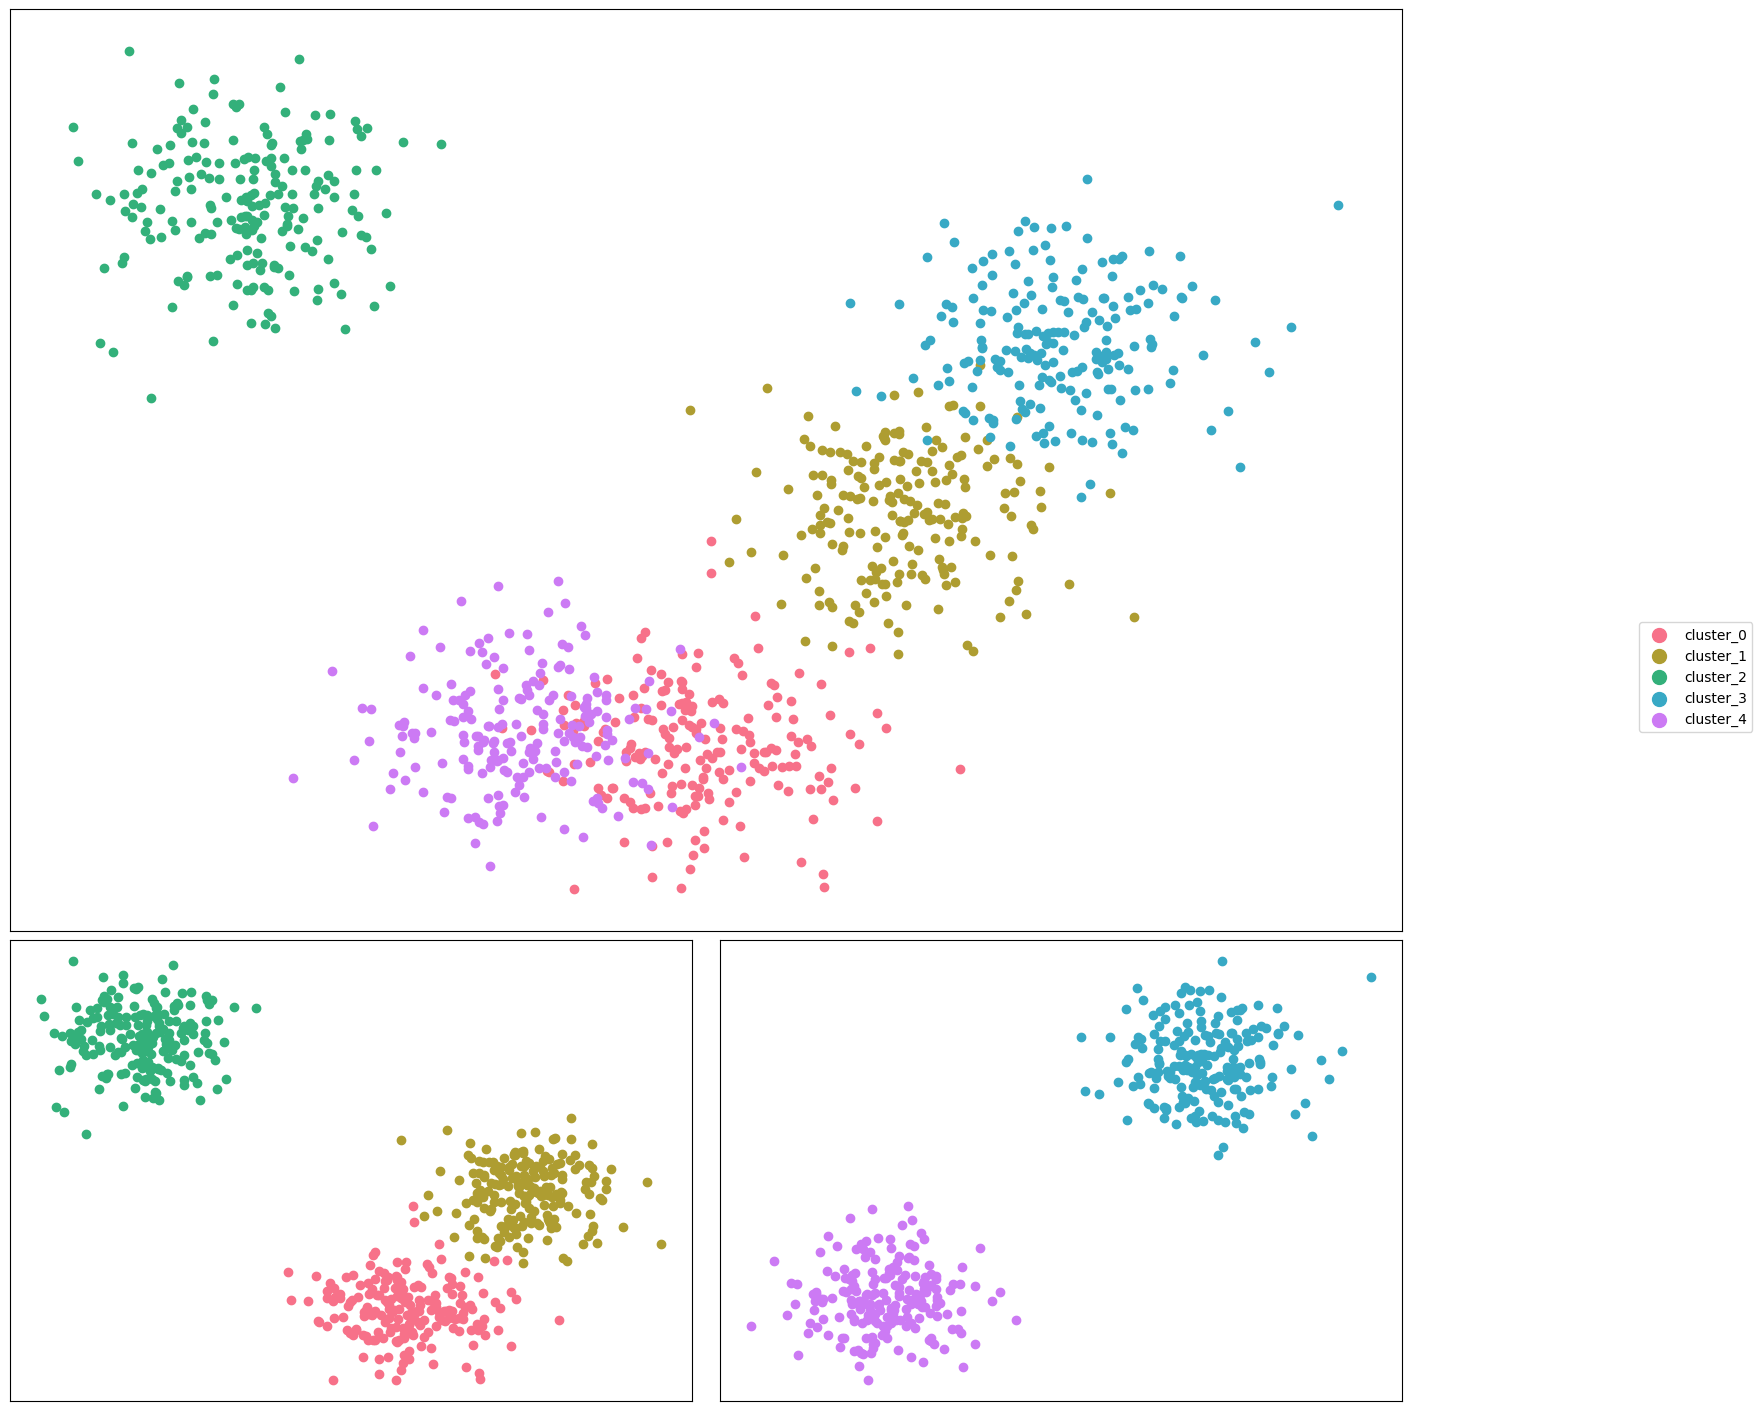

In [21]:
_ = cl.plot_clusters_groupings(data, 'kmeans_cluster', 'feature_0', 'feature_1', group_level='agg_cluster', group_value_ranges=['cluster_0', 'cluster_3'])

In [22]:
yearly_data = data.copy(deep=True)
yearly_data['year'] = np.random.randint(2000, 2020, size=len(data))
yearly_data = yearly_data.set_index('year', append=True)
yearly_data

,,,,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
,kmeans_cluster,agg_cluster,year,,,,,,,,,,,,,,,,
sample_0,cluster_1,cluster_0,2004,-0.194980,1.254796,-9.524979,2.985020,0.398546,2.091548,9.736626,4.273136,-2.155918,-0.704956,3.634870,-9.559823,3.925414,4.204070,-5.034615,-6.642884
sample_1,cluster_0,cluster_1,2005,-3.906855,-1.198190,0.726655,0.699463,10.553579,-8.224395,-6.710856,-6.548466,2.526965,-5.496246,-0.099776,-4.800387,-5.293182,-8.188856,2.923601,-5.897135
sample_2,cluster_1,cluster_0,2007,-1.023764,2.148136,-10.304530,3.314962,1.383192,3.556180,9.164662,1.038209,-4.351652,-1.177391,5.539949,-9.530431,4.064410,4.339739,-5.084274,-8.679195
sample_3,cluster_3,cluster_3,2008,1.708694,3.928565,1.763626,-0.843359,-2.307208,3.188995,-0.203232,8.434500,8.932563,-3.594343,3.057142,1.729632,0.771662,8.063468,-8.447705,-9.662974
sample_4,cluster_0,cluster_1,2018,-2.216142,-3.554518,2.420860,-1.925213,8.286455,-8.699966,-6.441094,-6.236828,2.779957,-5.078468,-1.466121,-5.726301,-6.883826,-7.673855,3.463933,-8.635754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample_995,cluster_2,cluster_2,2015,-10.594911,7.027345,4.858794,8.474947,8.945068,7.517167,-0.352687,5.868967,-8.784940,3.127535,-7.087412,9.525461,-0.073881,-3.160391,-4.433666,5.624461
sample_996,cluster_3,cluster_3,2005,-0.625571,4.265880,1.897962,1.173904,-2.152150,2.181391,-0.693208,8.491384,9.016605,-2.369646,6.238815,1.082242,0.216911,7.792359,-9.809825,-8.764321
sample_997,cluster_2,cluster_2,2009,-9.105620,5.397358,5.605529,7.631031,8.262592,6.926564,-1.806379,5.016428,-8.816787,2.847460,-7.797578,11.163437,-0.206628,-1.520387,-4.989203,6.371332


/Users/sebastian/Desktop/MontagnaInc/Projects/miToolsPro/mitoolspro/clustering/clustering_visualizations.py:377: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="upper left")


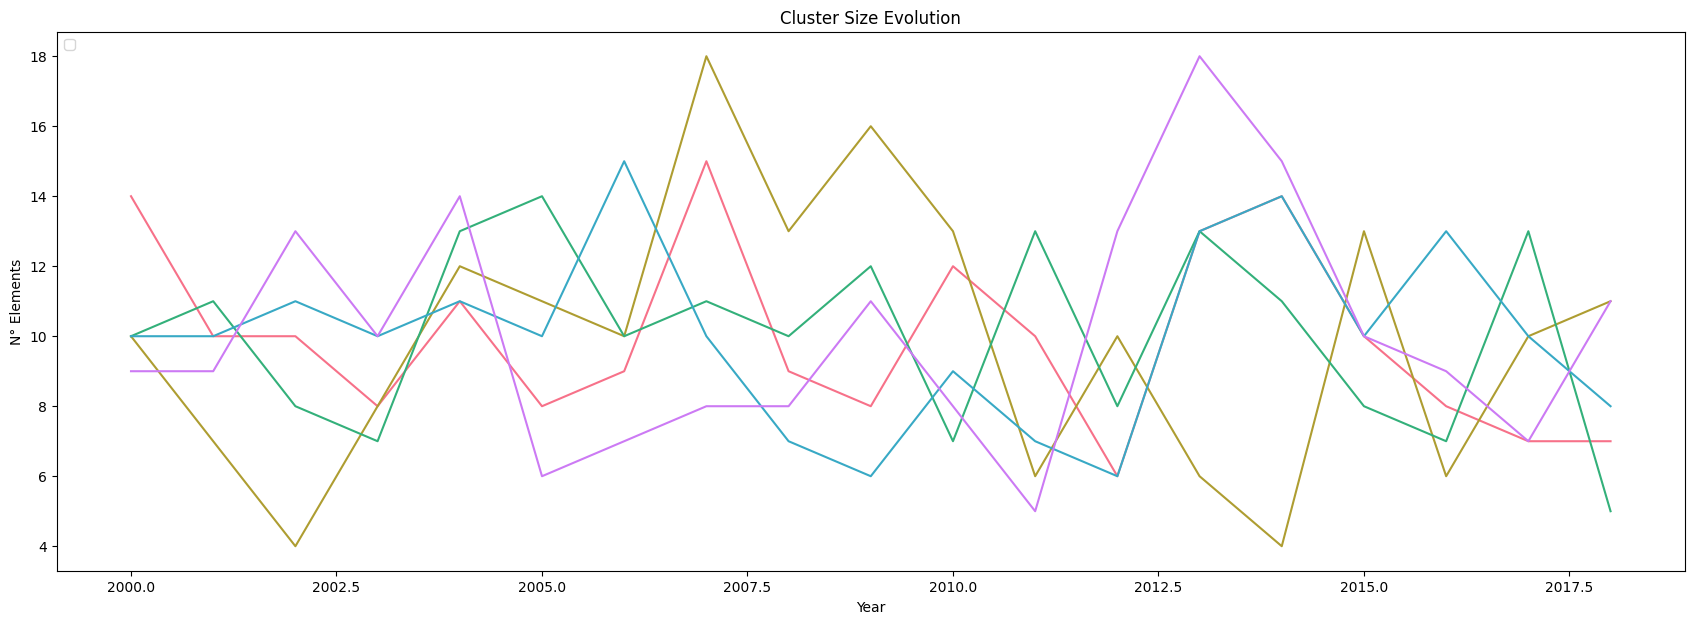

In [23]:
_ = cl.plot_clusters_growth(yearly_data, 'year', 'kmeans_cluster')

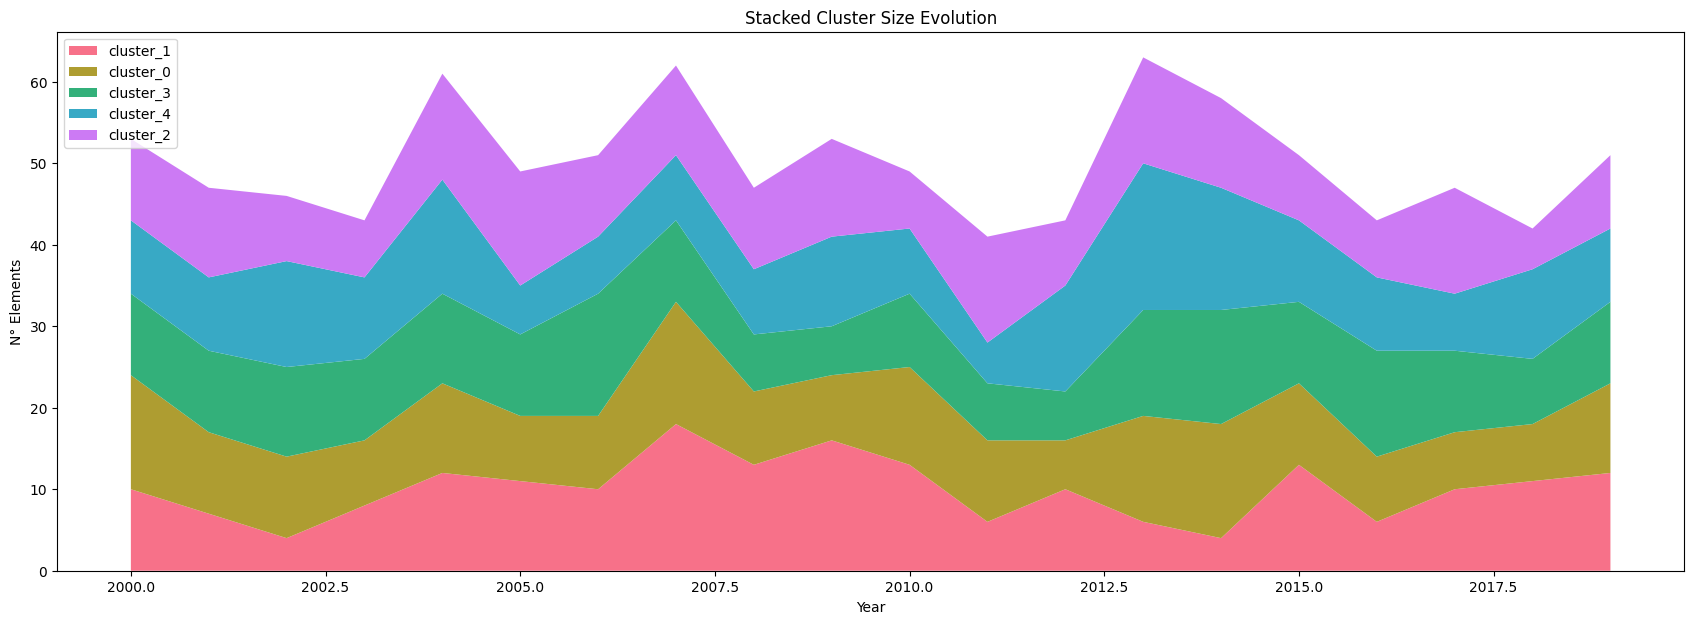

In [24]:
_ = cl.plot_clusters_growth_stacked(yearly_data, 'year', 'kmeans_cluster')

***